In [0]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plot
import random 

def nn2na(NN):
    # Get every location where exist an arc:
    idxs = np.argwhere(NN)
    # Preallocate NA matrix, dimension is (nodes, arcs)
    NA = np.zeros([NN.shape[0], idxs.shape[0]]).astype(int)
    #C = np.zeros(NA.shape[1])
    # Loop in every arc, complete from (1) to (-1)
    for i, arc in enumerate(idxs):
        # Node arc:
        NA[arc[0], i] = 1 # From
        NA[arc[1], i] = -1 # To
    arc_idxs = [(arc[0], arc[1]) for arc in idxs]
    return NA, arc_idxs

# Shortest path Utils
def get_selected_arcs(arc_idxs, selected_arcs):
    arcs = []
    for index, value in enumerate(selected_arcs):
        if value > 0:
            arcs.append(arc_idxs[index])
    return arcs

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.



Total Cost: 211.4656614653208


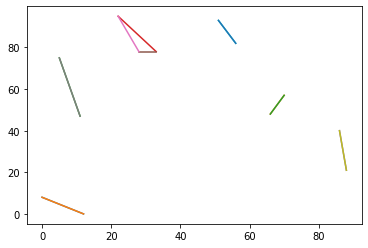


The resolution generates different subtours, so it can't find an optimal path to connect all the nodes
This could be done by implementing Dantzig's restrictions or a metaheuristic (eg GRASP or genenic )


In [20]:
num_cities = 13

coord = np.zeros((num_cities, 2))

random.seed(a=2)
for i in range(num_cities):
    for j in range(2):
        if i != j:
            coord[i, j] = random.randint(1,100) 

node_names = np.zeros((num_cities), dtype = str) 
for i in range(0, num_cities):
    node_names[i] = ( chr( i + ord('a') ) )

costs = []
for i in range(num_cities):
   for j in range(num_cities):
      if i != j:
         costs.append(distance.euclidean(coord[i], coord[j])) 

NN = np.ones(shape=(num_cities,num_cities), dtype=np.int8)
np.fill_diagonal(NN,0)

NA, arcs = nn2na(NN)
Aeq1 = np.where(NA == 1, 1, 0)
Aeq2 = np.where(NA == -1, 1, 0)
Aeq = np.concatenate((Aeq1, Aeq2), axis=0)
beq = np.zeros(num_cities*2)
beq.fill(1)
bounds = tuple([(0, None) for arc in range(0, Aeq.shape[1])])

res = linprog(costs, A_eq=Aeq, b_eq=beq, bounds=bounds, method='simplex')

solution = []
for k in range(num_cities):
    temp = list(res.x[(num_cities-1)*k:(num_cities-1)*(k+1)])
    temp.insert(k, 0.0)
    solution.append(temp)

print("\nTotal Cost:", res.fun)
for i in range(num_cities):
    for j in range(num_cities):
        if solution[i][j] == 1:
            x = [coord[i][0], coord[j][0]]
            y = [coord[i][1], coord[j][1]]
            plot.plot(x, y)
plot.show()

print("\nThe resolution generates different subtours, so it can't find an optimal path to connect all the nodes")
print("This could be done by implementing Dantzig's restrictions or a metaheuristic (eg GRASP or genenic )")
